# Data Exploration | Analyzing Survey Data with SQL & Python 

## Import de librairies

In [1]:
# Import plotly.express using the alias px
import plotly.express as px

# From scipy.stats import the mannwhitneyu function
from scipy.stats import mannwhitneyu

## Importation des données

In [2]:
-- Requête sql pour afficher la table survey_data
SELECT * 
	FROM read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ")

,Growth_Firm,question_2_row_1_transformed,question_2_row_2_transformed,question_3_row_1,question_3_row_2,question_3_row_3,question_3_row_4,question_3_row_5,question_3_row_6,question_3_row_7,question_3_row_8,question_3_row_9,question_3_row_10,question_3_row_11,question_3_row_12,question_3_row_13,question_3_row_14,question_3_row_15,question_3_row_16,question_4_row_1,question_4_row_2,question_4_row_3,question_4_row_4,question_5_row_1,question_5_row_2,question_5_row_3,question_5_row_4,question_5_row_5,question_5_row_6,question_5_row_7,question_5_row_8,question_5_row_9,question_5_row_10,question_6_row_1,question_6_row_2,question_7_row_1
0,0,35.135135,50.750939,4,5,5,4,3,3,4,4,4,2,2,2,2,4,4,3,4,4,4,4,1,1,2,4,2,4,2,3,2.0,5.0,4,5,1
1,0,23.018043,51.182200,5,4,4,4,4,4,4,5,5,4,2,4,2,4,4,3,4,3,3,4,4,4,2,3,4,3,3,3,4.0,3.0,5,4,1
2,0,86.640472,62.932639,3,4,4,4,4,3,4,5,3,3,3,5,3,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,NaN,NaN,5,3,1
3,0,17.647059,39.130435,3,4,5,4,4,4,5,5,3,3,4,5,4,4,5,3,4,3,3,3,3,2,3,3,3,4,4,4,3.0,3.0,3,3,1
4,0,60.000000,32.802125,4,4,4,4,3,4,4,4,5,5,2,3,1,2,4,2,4,2,2,2,2,2,2,4,2,4,2,3,3.0,4.0,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,227.868852,1417.450683,3,4,4,3,2,4,3,3,3,3,4,4,4,3,3,3,3,2,2,2,2,2,2,2,3,3,3,4,3.0,3.0,3,4,2
116,1,316.666667,446.149645,5,5,5,4,4,5,5,4,5,5,5,4,3,4,1,4,3,2,2,1,2,3,2,4,4,2,2,2,3.0,3.0,2,2,2
117,1,566.666667,4996.839959,4,5,5,4,4,4,5,5,3,3,5,4,5,5,5,4,4,5,4,5,5,5,5,5,4,4,4,5,4.0,5.0,4,4,2
118,1,471.428571,465.770863,4,5,4,5,5,4,4,4,4,4,5,5,2,5,5,5,2,2,2,2,5,5,5,5,5,4,2,5,5.0,5.0,1,1,2


Les données de l'enquête sont contenues dans le fichier "What_does_it_take_to_generate_new_growth_Survey_data.csv".

Dictionnaire de données
L'ensemble de données contient les colonnes telles que:

Growth_Firm: L'entreprise est-elle actuellement classée comme entreprise de croissance selon les définitions de l'OCDE ?

question_2_row_1_transformed: Les réponses à la question 2, partie 1 (avec quelques transformations pré-appliquées).

question_2_row_2_transformed: Les réponses à la question 2, partie 2 (avec quelques transformations pré-appliquées).

question_3_row_1: Les réponses à la question 3, partie 1.
...
question_7_row_1: Les réponses à la question 7, partie 1.

Les détails de toutes les questions de l'enquête sont présentés dans le fichier survey_questions.csv. Nous aborderons ici les détails des questions spécifiques que nous examinons au fur et à mesure que nous les traiterons.

In [3]:
-- Select everything from survey_data.csv
SELECT * 
	FROM 'survey_questions.csv'

,column,question,row,section,title,response_type
0,question_2_row_1_transformed,2,1,estimated growth,Expected employee count in five years (as a pe...,numeric
1,question_2_row_2_transformed,2,2,estimated growth,Expected revenue in five years (as a percent f...,numeric
2,question_3_row_1,3,1,company culture,Employees are encouraged to be creative,agree_disagree
3,question_3_row_2,3,2,company culture,Managers are expected to be creative problem s...,agree_disagree
4,question_3_row_3,3,3,company culture,Employees' ability to function creatively is r...,agree_disagree
5,question_3_row_4,3,4,company culture,We are constantly looking for ways to develop ...,agree_disagree
6,question_3_row_5,3,5,company culture,Assistance in developing new ideas is readily ...,agree_disagree
7,question_3_row_6,3,6,company culture,Our organization is open and responsive to cha...,agree_disagree
8,question_3_row_7,3,7,company culture,"Managers here are always searching for fresh, ...",agree_disagree
9,question_3_row_8,3,8,company culture,Our organization has a clear and inspiring set...,agree_disagree


## Visualisation des réponses numériques

Comment évolue les chiffres d'affaires et les nombres d'employers des entreprises estimées en croissance.

Examinons dans un premier temps l'évolution du nombre d'employés.

Les réponses sont numériques et il est donc naturel de visualiser la distribution sous forme d'histogramme.

In [4]:
# Histogramme du taux de croissance des nombres d'employés en 5 ans (toutes entreprises confondues)
px.histogram(
    survey, 
    x="question_2_row_1_transformed",
    labels={
        "question_2_row_1_transformed": "Expected employee count in five years (as a percent from last available year)"
    })


Une question intéressante est de savoir si les entreprises actuellement classées comme en croissance ont des attentes différentes quant au nombre d’employés supplémentaires qu’elles recruteront au cours des cinq prochaines années par rapport aux entreprises sans croissance. Nous pouvons dessiner un histogramme pour chacun.

In [5]:
# Histogramme du taux de croissance des nombres d'employés en 5 ans (toutes entreprises confondues)
px.histogram(
    survey, 
    x="question_2_row_1_transformed",
    facet_row="Growth_Firm",
    labels={
        "question_2_row_1_transformed": "Expected employee count in five years (as a percent from last available year)"
    })


In [6]:
 # Histogramme du taux de croissance des chiffres d'affaires en 5 ans 
px.histogram(
    survey, 
    x="question_2_row_2_transformed",
    facet_row="Growth_Firm",
    labels={
        "question_2_row_2_transformed": "Expected revenue in five years (as a percent from last available year)"
    }
)

Du point de vue du nombre d'employé que du chiffre d'affaire, les histogrammes des deux groupes sont assez proches. Cependant, il peut y avoir une différence statistiquement significative entre les deux groupes.

Nos données n'ont pas de courbe de distribution normale en forme de cloche, pour les comparer, nous utilisons alors un test U de Mann-Whitney (test Wilcoxon Rank Sum) alternativement à un test de student.

## Test de significativité entre les deux groupes d'entreprises

In [7]:
-- table des entreprises estimées en tendance non croissante (q2_1_non_growth)
SELECT question_2_row_1_transformed
	FROM read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ")
	WHERE Growth_Firm = 0

,question_2_row_1_transformed
0,35.135135
1,23.018043
2,86.640472
3,17.647059
4,60.000000
5,-1.295497
6,12.275449
7,66.666667
8,9.375000
9,506.060606


In [8]:
-- -- table des entreprises estimées en tendance croissante (q2_1_growth)
SELECT question_2_row_1_transformed
	FROM read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ")
	WHERE Growth_Firm = 1

,question_2_row_1_transformed
0,580.272109
1,166.666667
2,400.000000
3,7.296137
4,25.000000
...,...
57,227.868852
58,316.666667
59,566.666667
60,471.428571


In [9]:
# test de signicativité
#HO: abscence de différence statistique entre les deux groupes
#H1: existence de différence statistique entre les deux groupes

#mannwhitneyu(survey[survey.Growth_Firm==0]['question_2_row_1_transformed'],
            #survey[survey.Growth_Firm==1]['question_2_row_1_transformed'])
    
mannwhitneyu(q2_1_non_growth, q2_1_growth)

MannwhitneyuResult(statistic=array([1299.]), pvalue=array([0.00884359]))

Pvalue << 5%, l'hypothèse nulle est rejetée, suggérant qu'il existe une différence significative entre entreprises en croissance et les autres du point de vue de l'évolution des nombres d'employés 

## Visualisation des réponses catégorielles

De nombreuses questions de l'enquête comportent des réponses catégorielles avec 5 options allant de « Fortement en désaccord » à « Tout à fait d'accord ».

Les valeurs sont codées de « 1 » pour « Fortement en désaccord » à « 5 » pour « Fortement d'accord ». Pour visualiser les réponses, il est préférable d’avoir des labels explicites plutôt que des chiffres.

Nous allons progressivement créer la requête SQL pour obtenir les décomptes pour chaque type de réponse, puis dessiner un graphique à barres.


In [10]:
-- voir les modalités des réponses catégorielles 
SELECT *
	FROM 'agree_disagree.csv'

,code,response
0,1,Strongly disagree
1,2,Disagree
2,3,Neither agree or disagree
3,4,Agree
4,5,Strongly agree


Nous allons à présent chercher à obtenir la distribution de fréquences pour chacunes des 5 modalités pour une question catégorielle donnée (question_3_row_1). Pour ce faire, nous allons intégrer une jointure de tables

In [11]:
-- jointure pour associer les labels aux codes pour la première question catégorielle (question_3_row_1)
SELECT 
	lookup.response, 
	survey.question_3_row_1
	FROM 'agree_disagree.csv' AS lookup 
	LEFT JOIN read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ") AS survey
		ON lookup.code = survey.question_3_row_1

,response,question_3_row_1
0,Agree,4.0
1,Strongly agree,5.0
2,Neither agree or disagree,3.0
3,Neither agree or disagree,3.0
4,Agree,4.0
...,...,...
116,Strongly agree,5.0
117,Agree,4.0
118,Agree,4.0
119,Neither agree or disagree,3.0


In [12]:
-- Afficher une distribution de fréquence pour des modalités de réponses de la question 
-- question_3_row_1
SELECT 
	lookup.response, 
	COUNT(survey.question_3_row_1) as n
	FROM 'agree_disagree.csv' AS lookup 
	LEFT JOIN read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ") AS survey
		ON lookup.code = survey.question_3_row_1
	GROUP BY lookup.response

,response,n
0,Agree,67
1,Strongly agree,29
2,Neither agree or disagree,18
3,Strongly disagree,0
4,Disagree,6


In [13]:
-- Dataframe q3_1_counts : ajouter colonne 'agreement' (gradient de niveau d'accord)
SELECT 
	lookup.response, 
	COUNT(survey.question_3_row_1) AS n,
	lookup.code - 3 AS agreement
	FROM 'agree_disagree.csv' AS lookup 
	LEFT JOIN read_csv_auto("survey_data.csv", delim=";", decimal_separator=",", nullstr=" ") AS survey
		ON lookup.code = survey.question_3_row_1
	GROUP BY lookup.code, lookup.response
	ORDER BY lookup.code
	

,response,n,agreement
0,Strongly disagree,0,-2
1,Disagree,6,-1
2,Neither agree or disagree,18,0
3,Agree,67,1
4,Strongly agree,29,2


Une fois la table de distribution obtenue, nous pouvons alors visualiser par un diagramme en barres la ditribution des fréquences de modalités de réponses

In [14]:
# barplot de q3_1_counts
px.bar(
    q3_1_counts, 
    x="response", 
    y="n", 
    color="agreement", 
    color_continuous_scale=px.colors.diverging.Armyrose_r
)

## Automatisation de la visualisation des réponses aux questions catégorielles

Pour faciliter la visualisation des réponses aux questions catégorielles de l'enquête, nous allons construire une fonction automatisant la visualisation de la distribution de fréquences pour les réponses aux questions catégorielles

In [17]:
import duckdb

# Connecter à DuckDB aux fichiers de données
con = duckdb.connect('mydatabase.duckdb')  # ou duckdb.connect() pour une base de données en mémoire

# Charger plusieurs fichiers CSV en tables
files = {
    'agree_disagree': {'file_path':'agree_disagree.csv', 'delim':','},
    'survey_data': {'file_path' :'survey_data.csv', 'delim':';'},
    # Ajoutez d'autres fichiers s'il en reste...
}

# Créer et charger des tables
for table_name, file_infos in files.items():
    con.execute(f"""
    CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM read_csv_auto('{file_infos['file_path']}', delim='{file_infos['delim']}', decimal_separator=',', nullstr=' ', header='1');
    """)

# Voir les tables disponibles
tables = con.execute("SHOW TABLES").fetchall()
print("Tables:", tables)

Tables: [('agree_disagree',), ('survey_data',)]


In [18]:
#voir caractéristiques des tables
con.execute("PRAGMA table_info(agree_disagree)").fetchall()

[(0, 'code', 'BIGINT', False, None, False),
 (1, 'response', 'VARCHAR', False, None, False)]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
def get_frequency(var_categorielle):
    query = f"""
    SELECT 
        lookup.response, 
        COUNT(survey.{var_categorielle}),
        lookup.code - 3
    FROM agree_disagree AS lookup
    LEFT JOIN survey_data AS survey
    ON  lookup.code = survey.{var_categorielle}  
    GROUP BY lookup.code, lookup.response
    ORDER BY lookup.code;
    """
    
    results = con.execute(query).fetchall()
    dtf=pd.DataFrame(results, columns=['response', 'n', 'agreement'])
    #return dtf

    # Générer le barplot
    plt.figure(figsize=(10, 6))
    plt.bar(dtf['response'], dtf['n'], color='skyblue')
    plt.xlabel('Response')
    plt.ylabel('nbr')
    plt.title(f'Frequence des réponses pour la question {var_categorielle} ')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Application de get_frequency sur les questions catégorielles

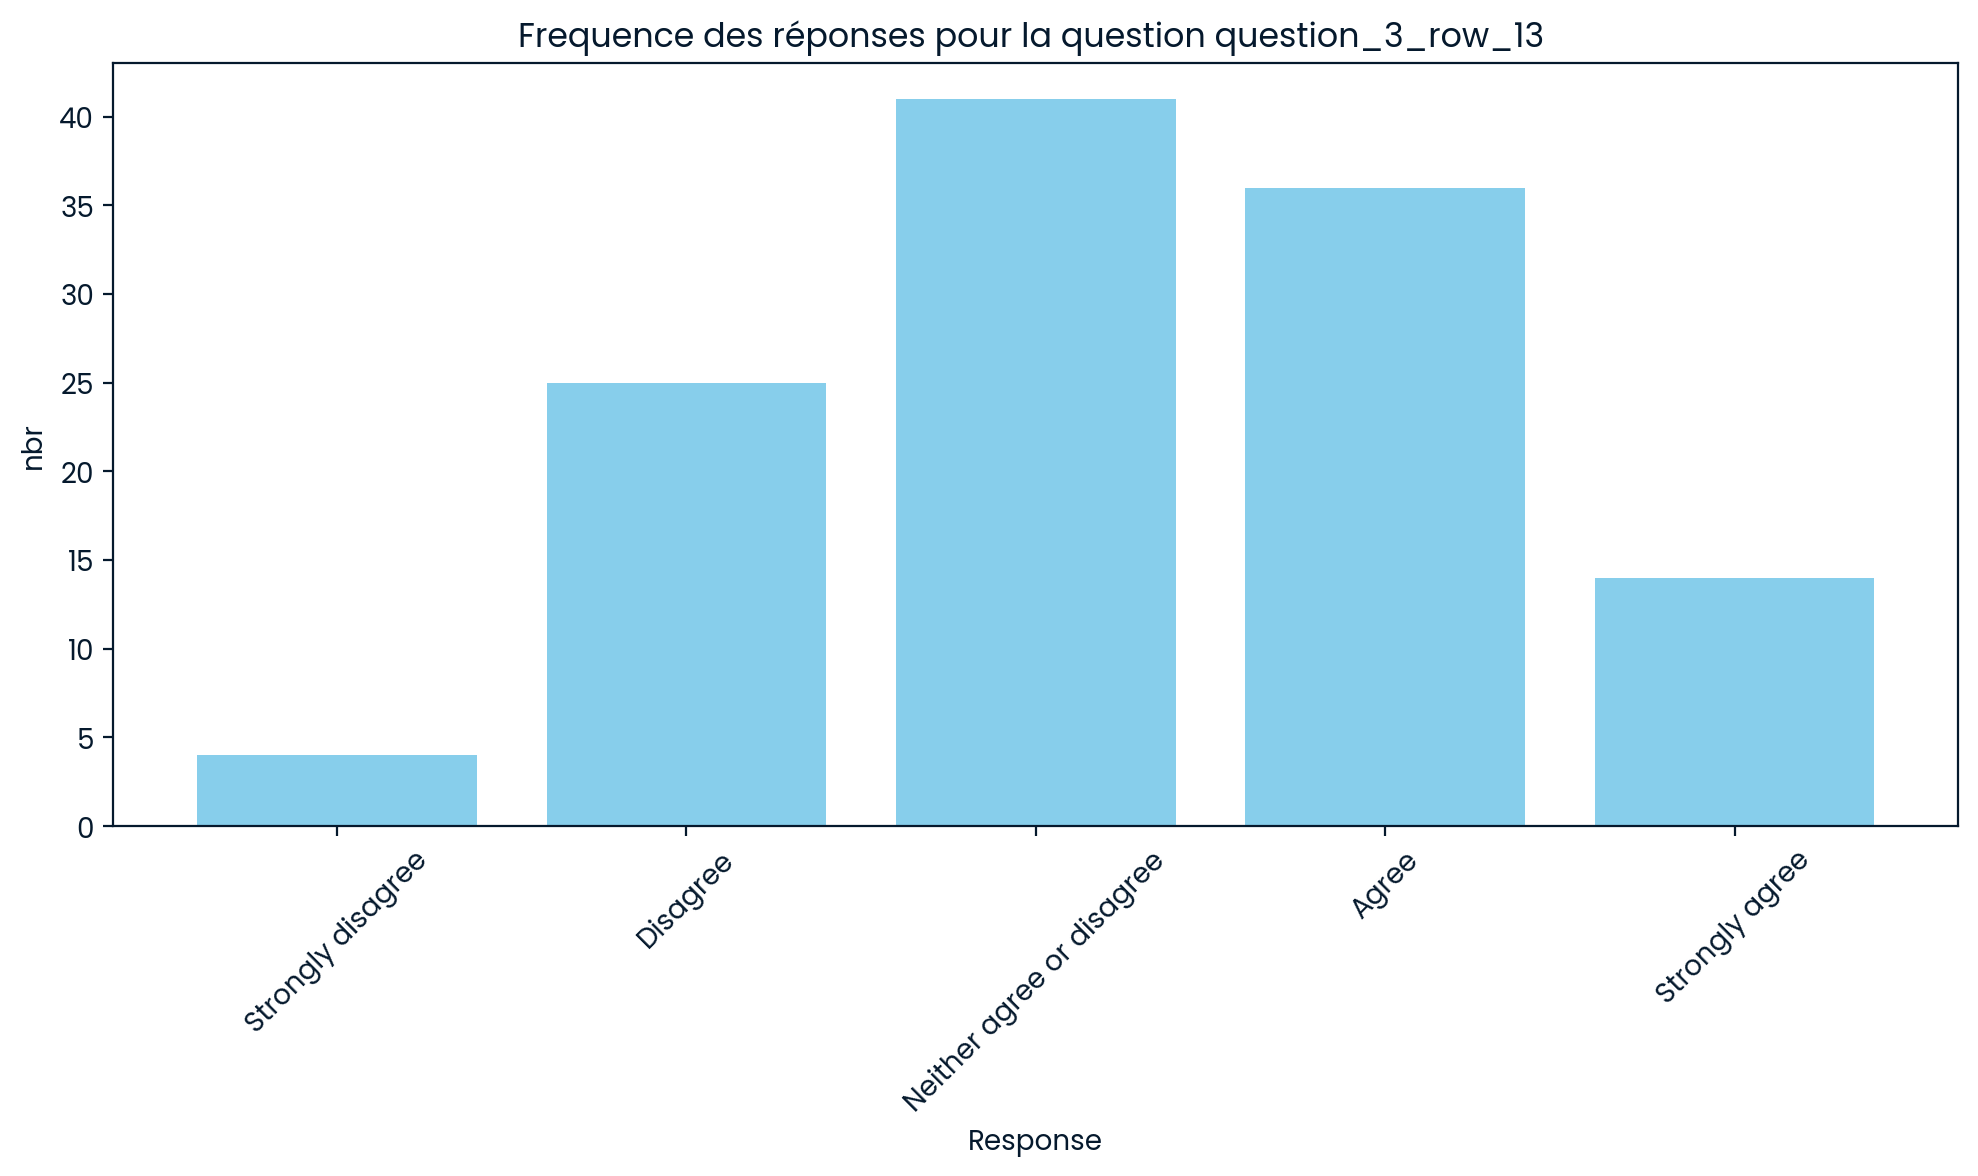

In [24]:
get_frequency('question_3_row_13')

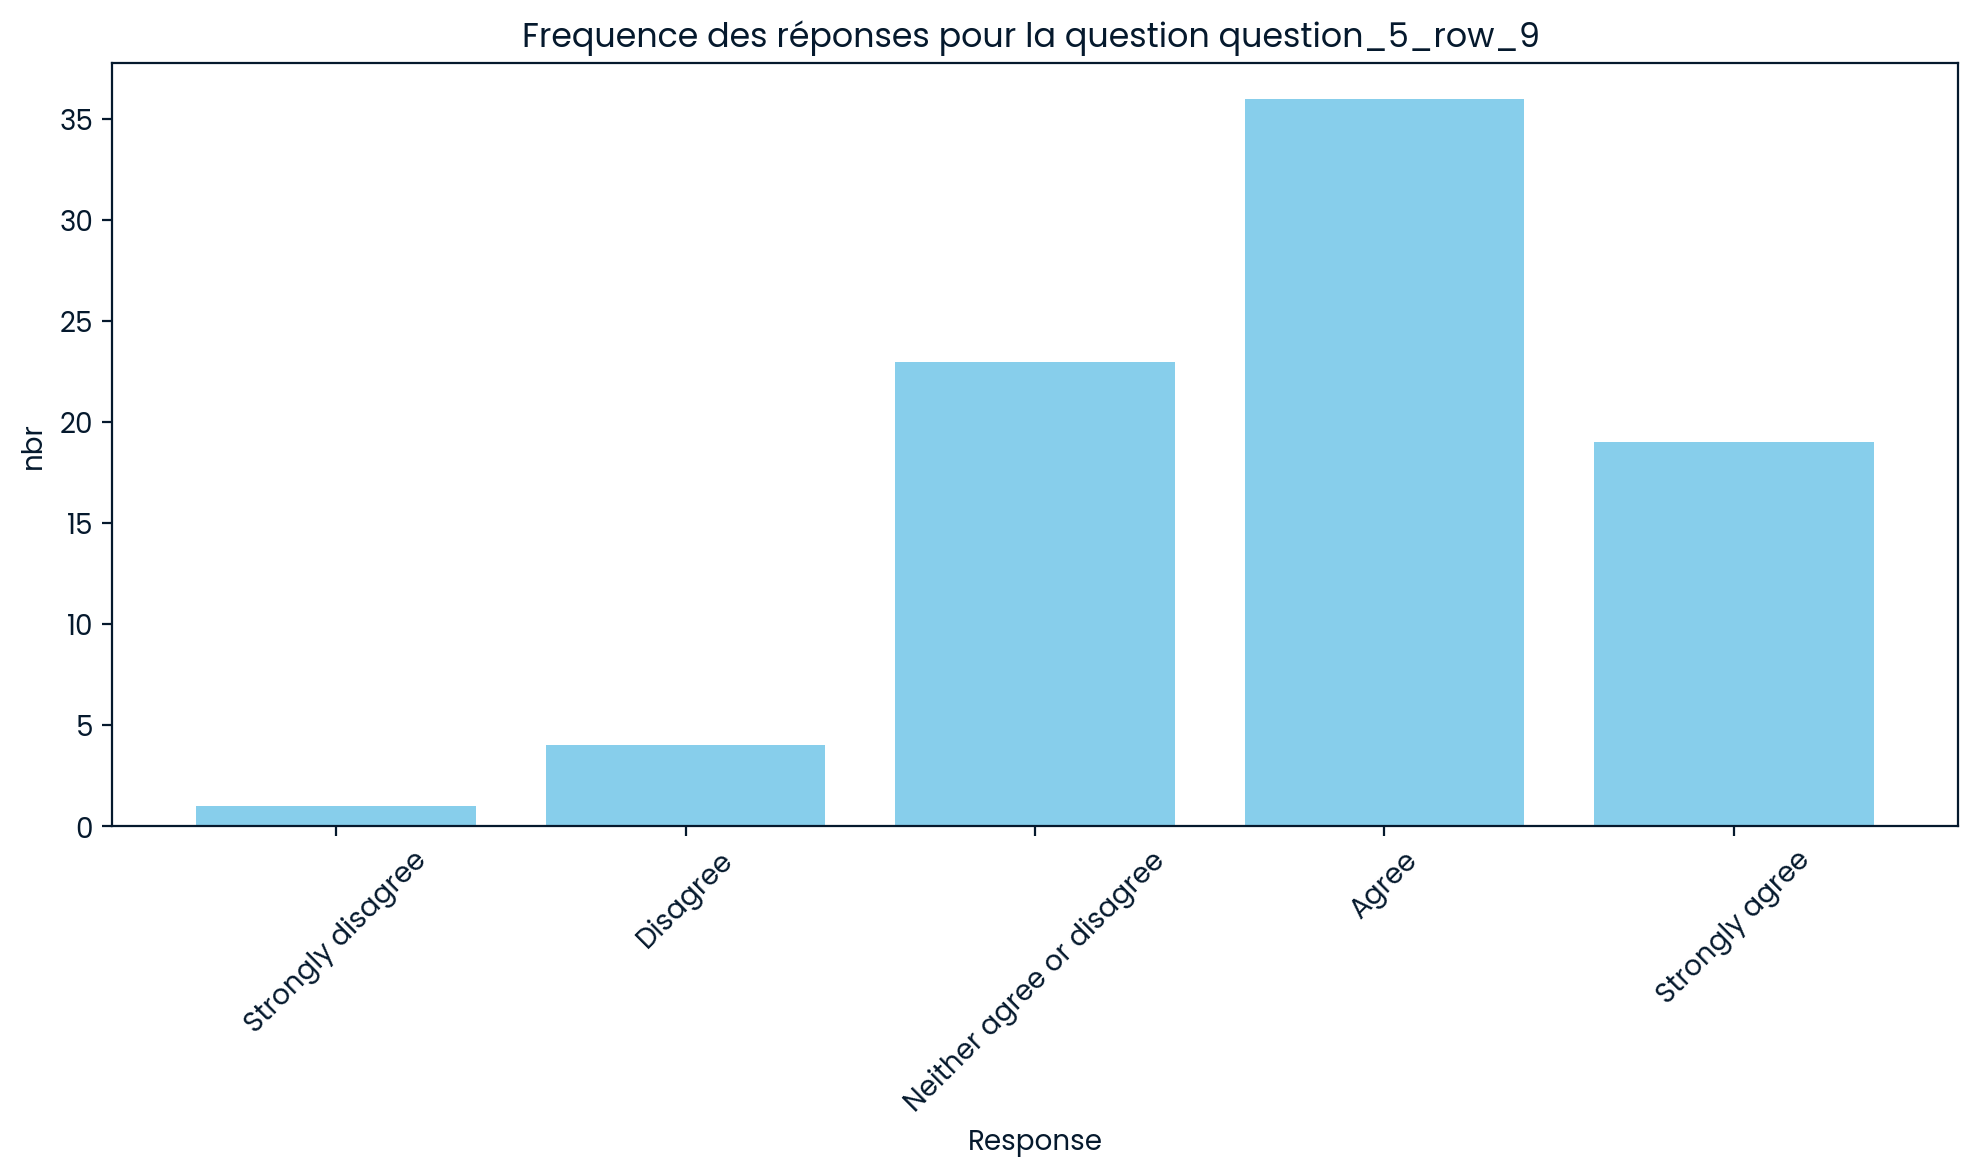

In [21]:
get_frequency('question_5_row_9')

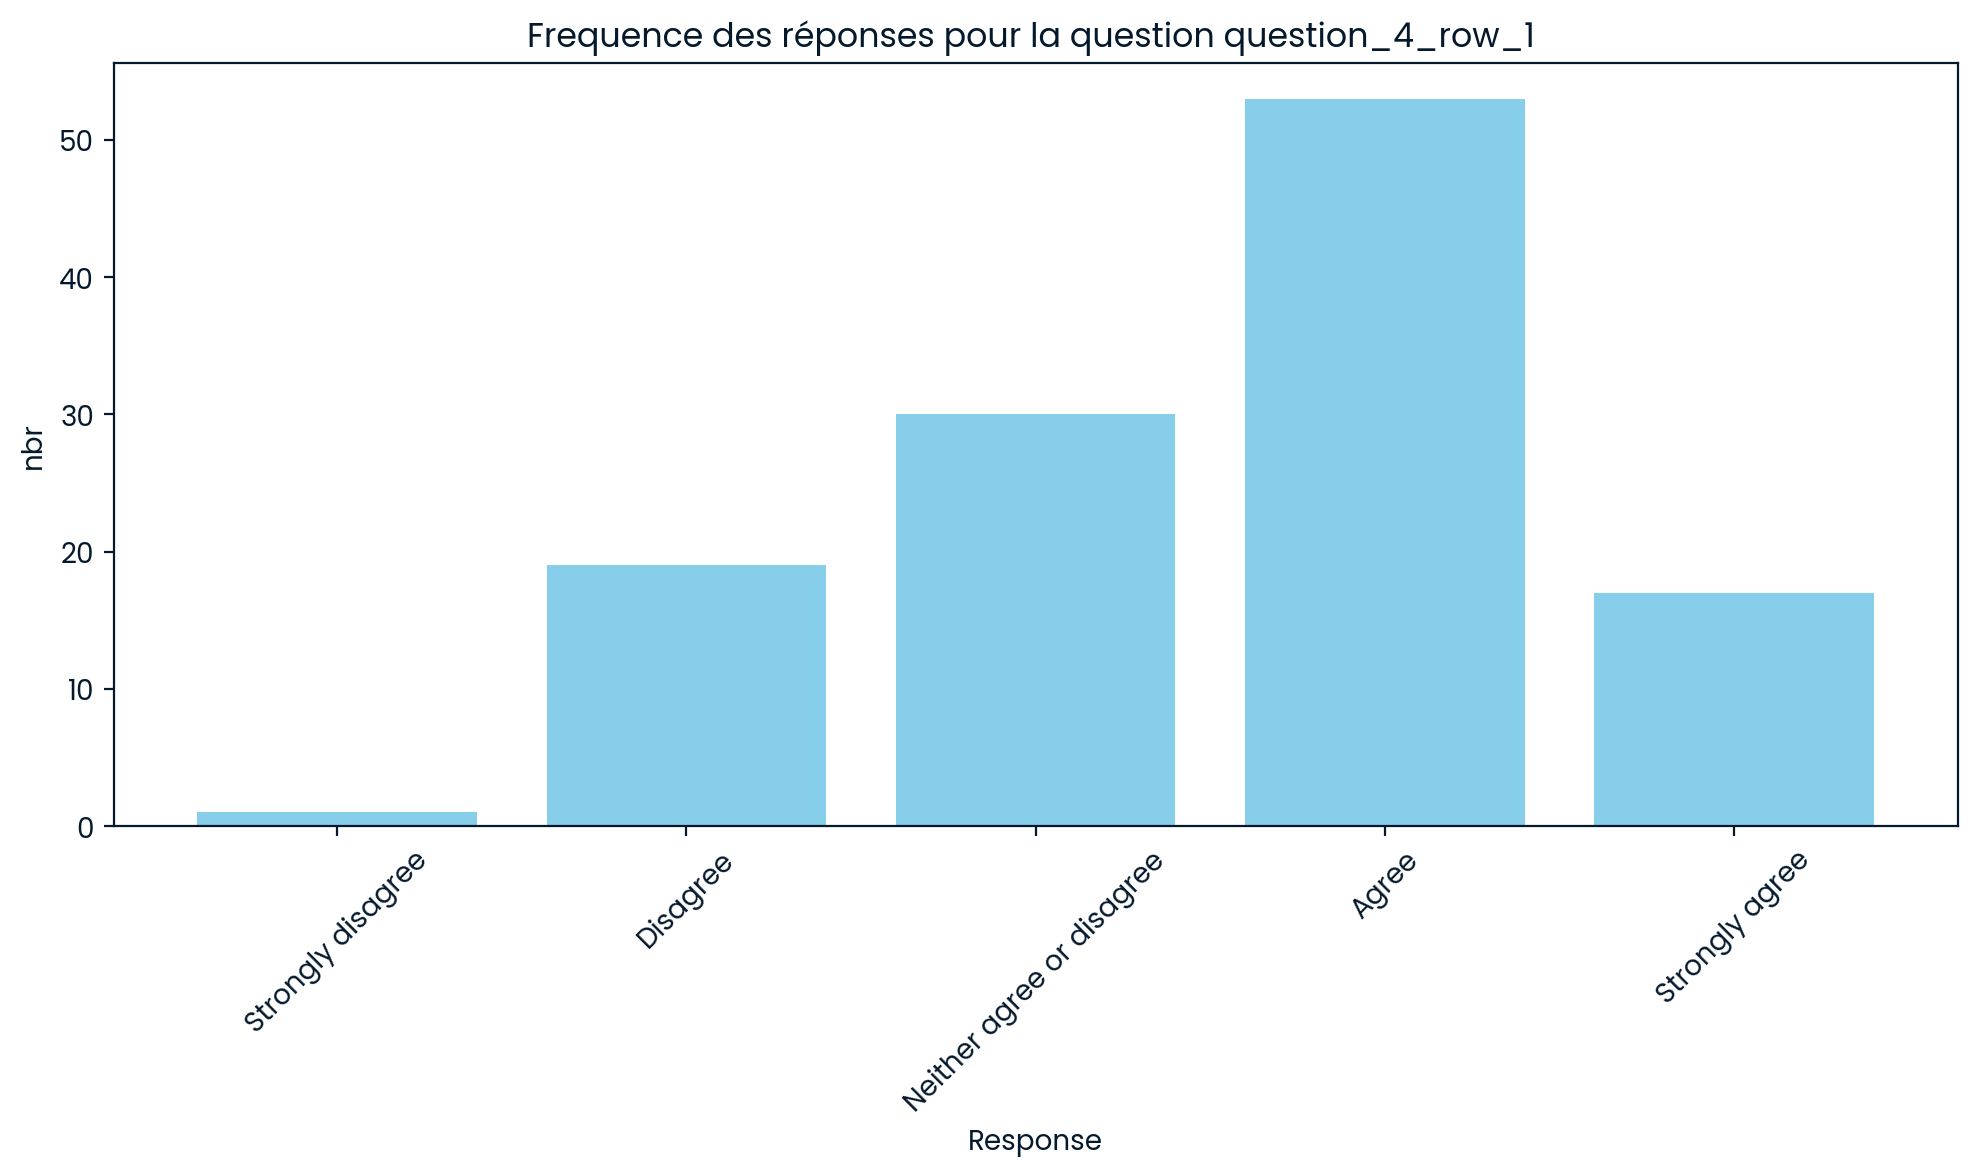

In [25]:
get_frequency('question_4_row_1')

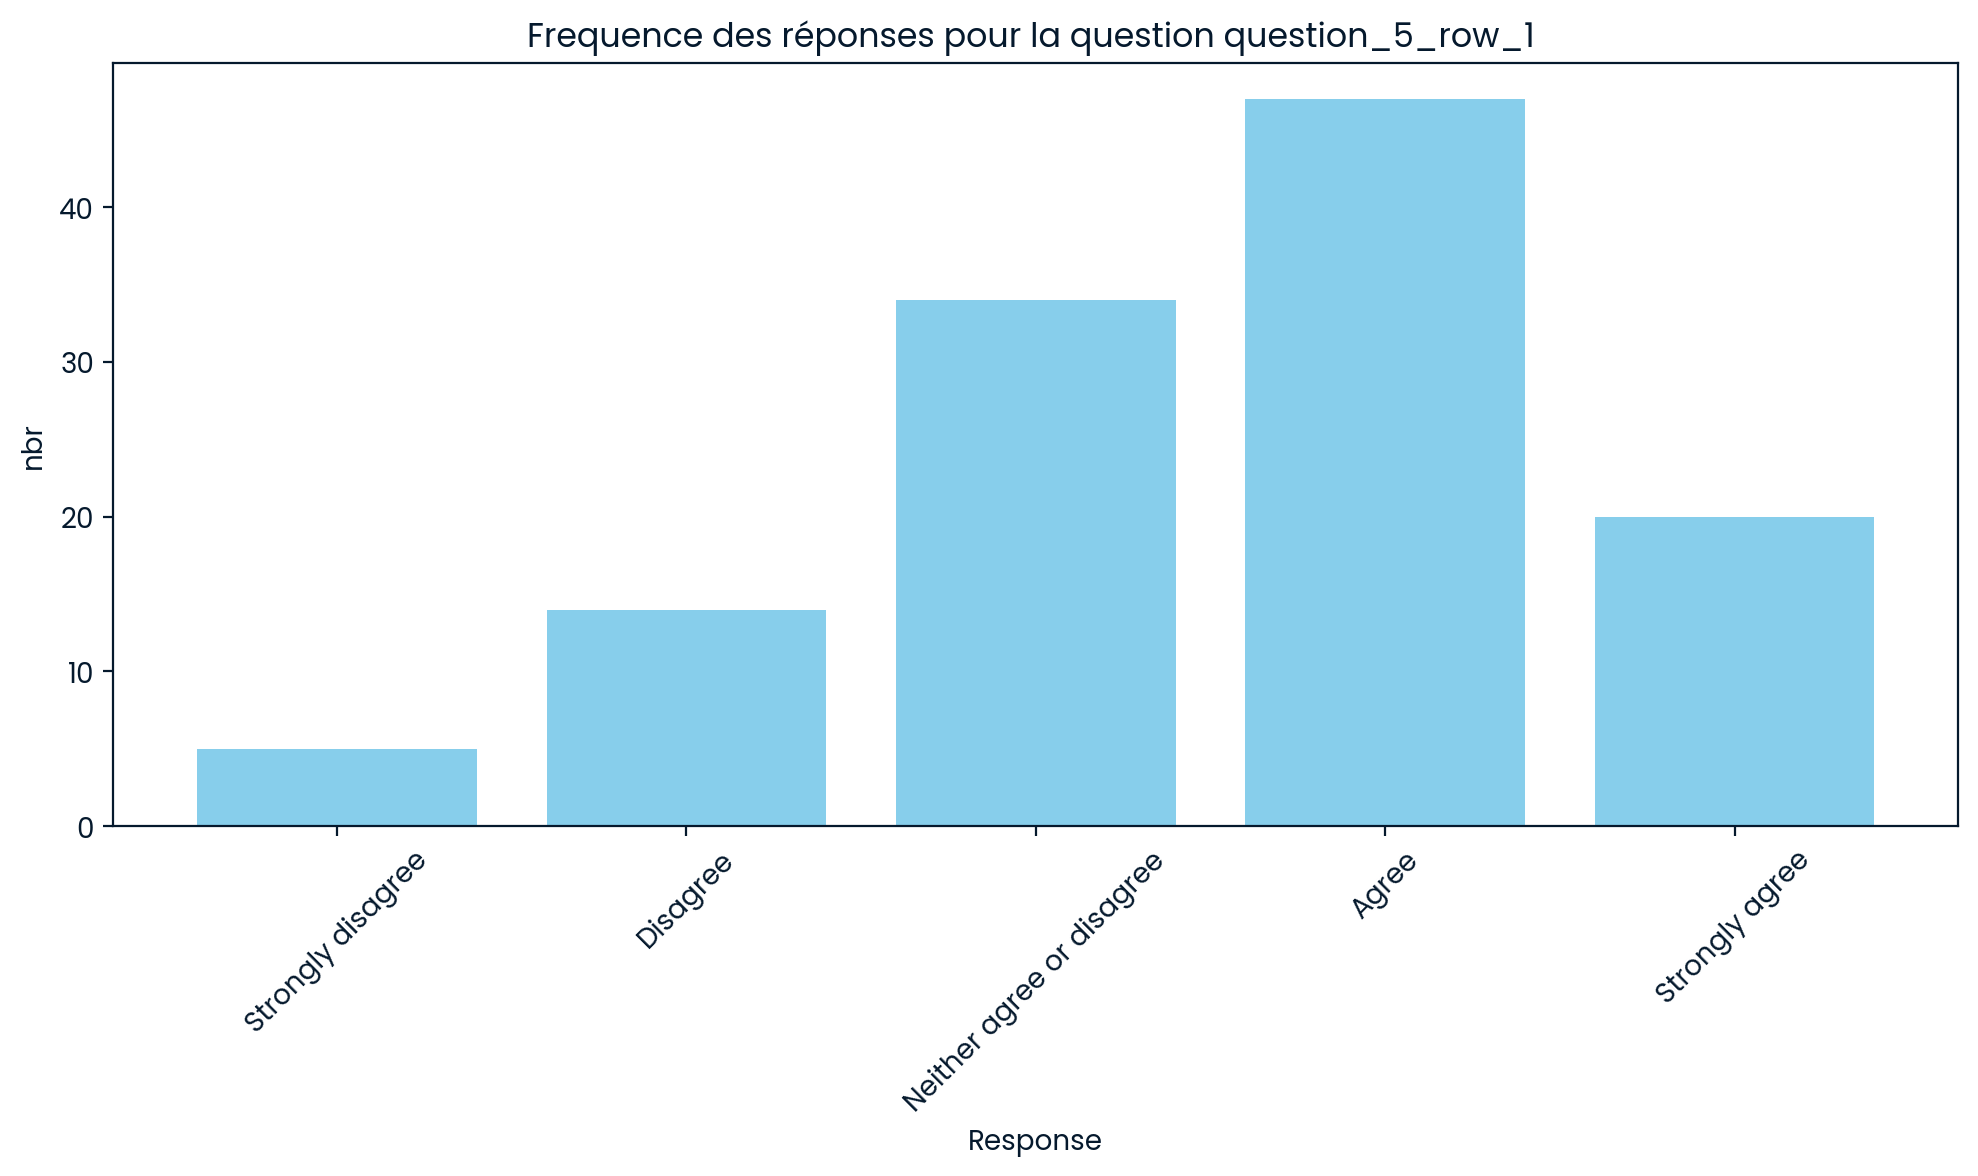

In [30]:
get_frequency('question_5_row_1')

## Visualisation par scatter plot des relations entre taux de croissance du chiffre d'affaire et taux de croissance du nombre d'employés 

In [22]:
# Create the scatter plot pour les entreprises estimées en tendance non croissante
px.scatter(survey[survey.Growth_Firm == 0], x='question_2_row_1_transformed', y='question_2_row_2_transformed',
           labels={'question_2_row_1_transformed': 'staff growth rate',
                  'question_2_row_2_transformed': 'revenue growth rate'})

In [23]:
# Create the scatter plot pour les entreprises estimées en tendance croissante
px.scatter(survey[survey.Growth_Firm == 1], x='question_2_row_1_transformed', y='question_2_row_2_transformed',
           labels={'question_2_row_1_transformed': 'staff growth rate',
                  'question_2_row_2_transformed': 'revenue growth rate'})